# Task 1: - Data analysis and ML Classifier

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm

## Data Exploration

In [2]:
loans = pd.read_csv('train.csv')
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Variable Analysis

In [4]:
# data exploration
loans.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001157,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


<IPython.core.display.Javascript object>


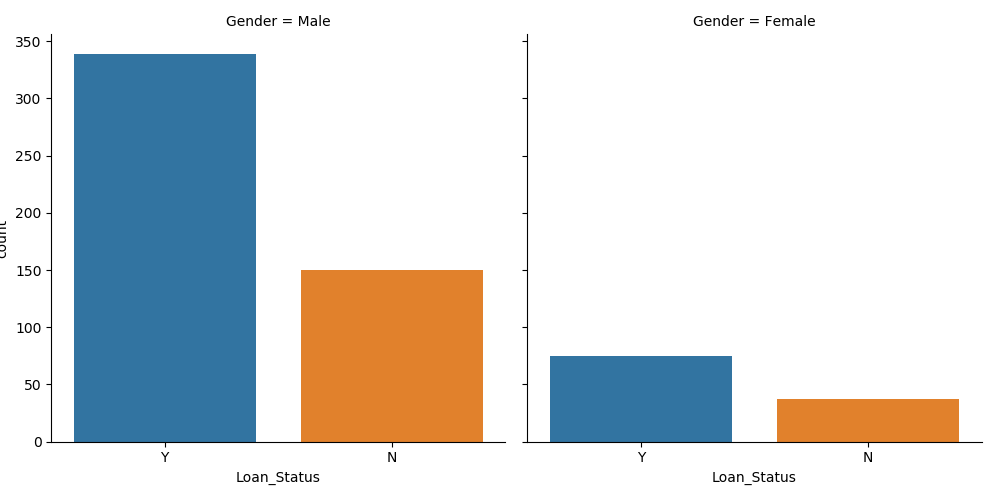

In [5]:
# eda with discrete variables
sns.catplot(x='Loan_Status', col='Gender', kind='count', data=loans)

<IPython.core.display.Javascript object>


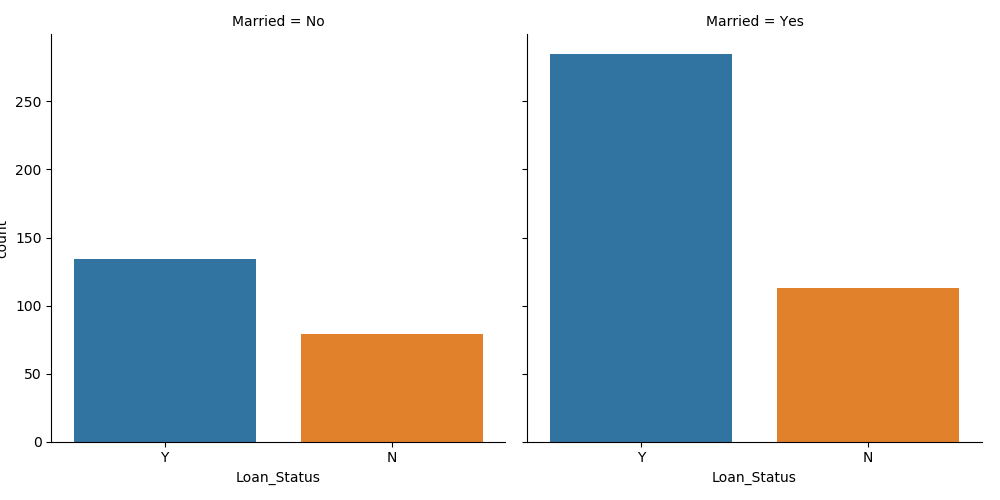

In [6]:
sns.catplot(x='Loan_Status', col='Married', kind='count', data=loans)

<IPython.core.display.Javascript object>


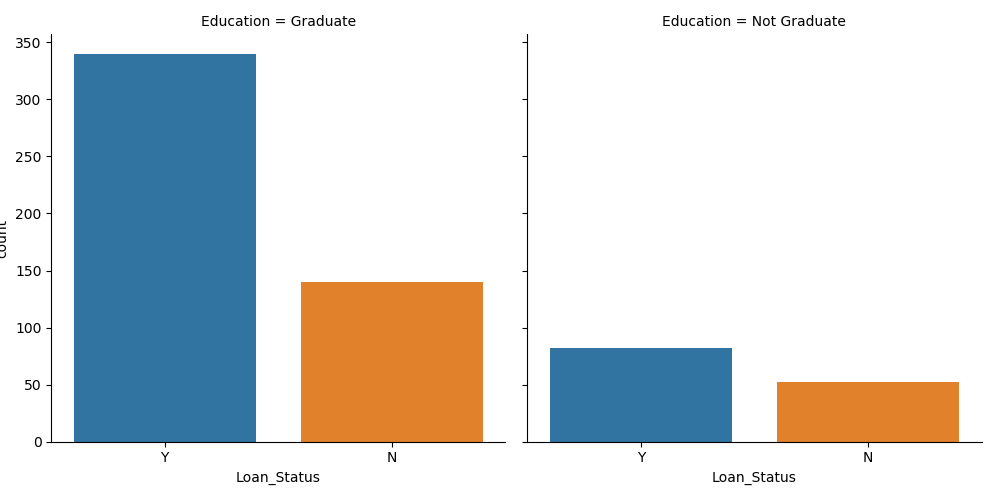

In [7]:
sns.catplot(x='Loan_Status', col='Education', kind='count', data=loans)

<IPython.core.display.Javascript object>


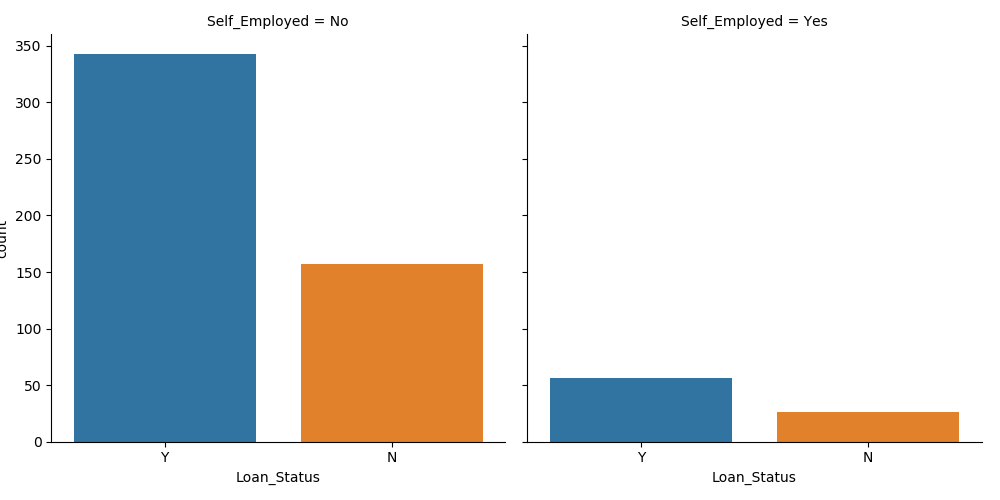

In [8]:
sns.catplot(x='Loan_Status', col='Self_Employed', kind='count', data=loans)

<IPython.core.display.Javascript object>


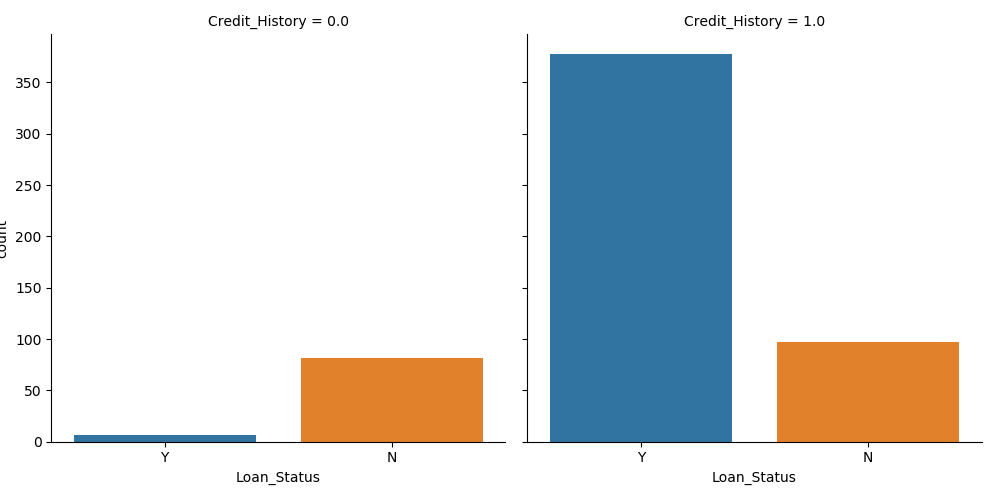

In [9]:
sns.catplot(x='Loan_Status', col='Credit_History', kind='count', data=loans)

<IPython.core.display.Javascript object>


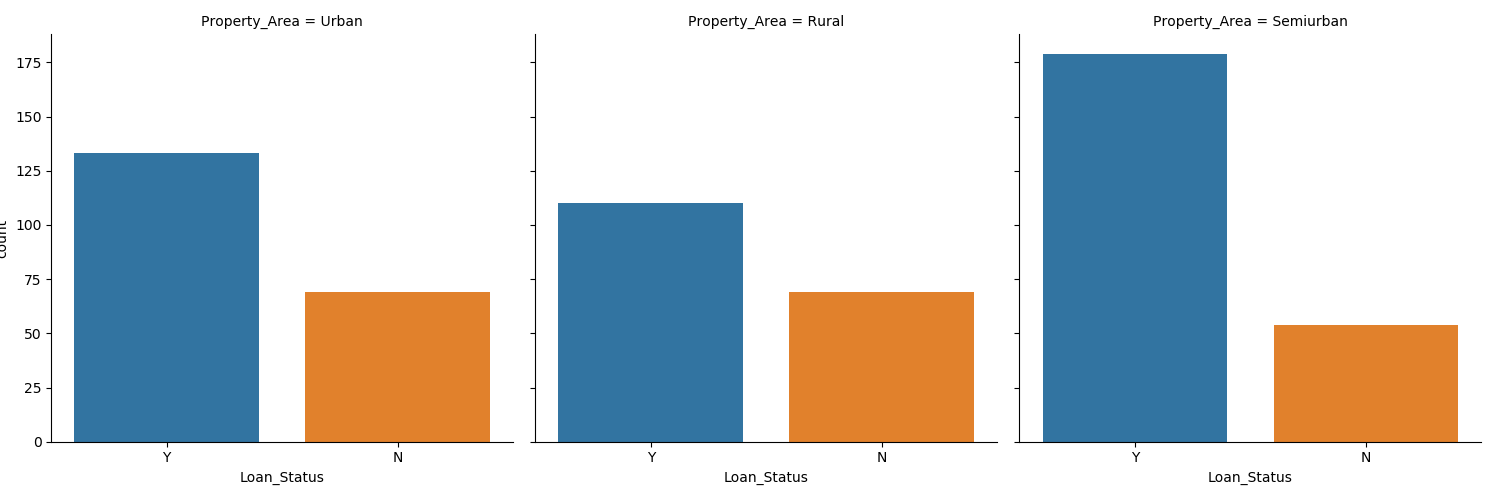

In [10]:
sns.catplot(x='Loan_Status', col='Property_Area', kind='count', data=loans)

<IPython.core.display.Javascript object>


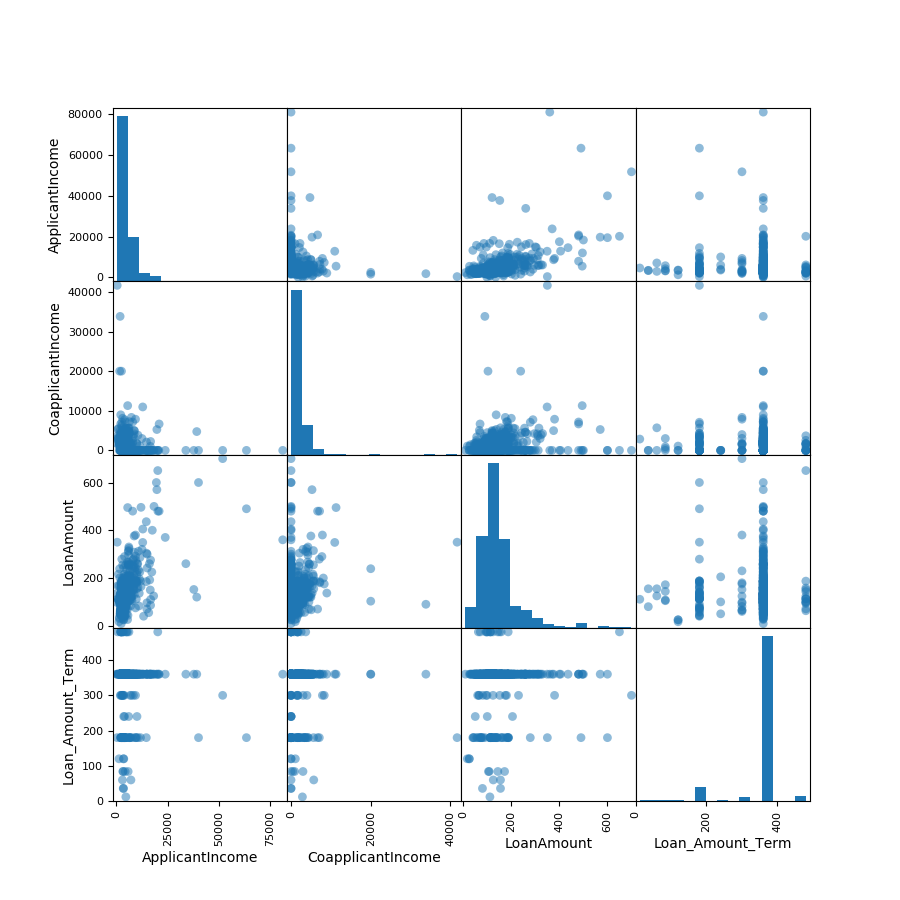

In [11]:
# eda with numeric variables
X_con = loans[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
y_con = loans['Loan_Status']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_con, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [12]:
# naive classifier approving all loans will be correct 68.7% of the time (baseline)
loans.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

## Data pre-processing

In [13]:
# clean data
loans['Dependents'] = loans['Dependents'].fillna(0).apply(lambda x: int(3) if x == '3+' else int(x))

In [14]:
# remove outliers

In [15]:
# impute missing values

# assume Female if Gender not entered
# assume Single if Married not entered 
# assume None if Dependents not entered 
# assume Self-employed if Self_Employed not entered 
# assume Bad if Credit History not entered 

In [16]:
# encode categorical features
loans['Is_Male'] = loans['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
loans['Is_Married'] = loans['Married'].apply(lambda x: 1 if x == 'Yes' else 0)
loans['Is_Family'] = loans['Dependents'].apply(lambda x: 1 if x > 0 else 0)
loans['Is_Graduate'] = loans['Education'].apply(lambda x: 1 if x == 'Graduate' else 0)
loans['Is_Employed'] = loans['Self_Employed'].apply(lambda x: 1 if x == 'No' else 0)
loans['Is_Good'] = loans['Credit_History'].apply(lambda x: 1 if x == 1.0 else 0)
loans['Is_Urban'] = loans['Property_Area'].apply(lambda x: 1 if x == 'Urban' else 0)
loans['Is_Semi'] = loans['Property_Area'].apply(lambda x: 1 if x == 'Semiurban' else 0)
loans['Is_Rural'] = loans['Property_Area'].apply(lambda x: 1 if x == 'Rural' else 0)
loans['Is_Approved'] = loans['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

loans.head()
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Is_Male            614 non-null    int64  
 14  Is_Married         614 non-null    int64  
 15  Is_Family          614 non-null    int64  
 16  Is_Graduate        614 non

## Modelling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

/Users/malcom/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [18]:
# training and test sets
X = loans.iloc[:,13:22].values
y = loans.iloc[:,22].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
X_train

array([[1, 1, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [19]:
# feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/Users/malcom/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
# model selection: want high accuracy high precision
classifiers = [LogisticRegression(),
               KNeighborsClassifier(n_neighbors = 5),
               SVC(kernel = 'rbf'),
               DecisionTreeClassifier(max_depth=3),
               GaussianNB(),
               RandomForestClassifier(n_estimators=10, random_state=7, max_depth=3),
               GradientBoostingClassifier(random_state=7)]

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(accuracy, precision, recall, f1, type(clf).__name__)

0.7727272727272727 0.7692307692307693 0.9183673469387755 0.8372093023255814 LogisticRegression
0.6948051948051948 0.6946564885496184 0.9285714285714286 0.7947598253275109 KNeighborsClassifier
0.7792207792207793 0.7857142857142857 0.8979591836734694 0.838095238095238 SVC
0.7792207792207793 0.7857142857142857 0.8979591836734694 0.838095238095238 DecisionTreeClassifier
0.7792207792207793 0.7857142857142857 0.8979591836734694 0.838095238095238 GaussianNB
0.6948051948051948 0.6888888888888889 0.9489795918367347 0.798283261802575 RandomForestClassifier
0.7727272727272727 0.7603305785123967 0.9387755102040817 0.8401826484018265 GradientBoostingClassifier


In [21]:
# training and cross-validation

#clf = LogisticRegression()
#clf = KNeighborsClassifier(n_neighbors = 5)
clf = SVC(kernel = 'rbf')
#clf = DecisionTreeClassifier(max_depth=3)
#clf = GaussianNB()
#clf = RandomForestClassifier(n_estimators=10, random_state=7, max_depth=3)
#clf = GradientBoostingClassifier(random_state=7)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
new_user = np.array([1, 1, 1, 1, 1, 1, 0, 0, 1]).reshape(1,-1)
y_pred = clf.predict(X_test)

y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [23]:
accuracy_score(y_test, y_pred)

0.7792207792207793

In [24]:
confusion_matrix(y_test, y_pred)

array([[32, 24],
       [10, 88]])

In [25]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.76      0.57      0.65        56
          1       0.79      0.90      0.84        98

avg / total       0.78      0.78      0.77       154



# Task 2.1: - Frontend

In [26]:
# dash web app with form gui for user input and realtime output of result 
# python dash_frontend.py
# http://127.0.0.1:8050/ 

import pickle

In [27]:
# save model
file = './models/clf.sav'
fhand = open(file, 'wb')
pickle.dump(clf, fhand)

In [28]:
def pred_loan(x1, x2, x3, x4, x5, x6, x7, x8, x9):
    file = './models/clf.sav'
    model = pickle.load(open(file, 'rb'))
    new_user = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9]).reshape(1,-1)
    y_pred = model.predict(new_user)
    return y_pred

In [29]:
pred_loan(1, 0, 0, 1, 0, 1, 1, 0, 0)[0]

1

In [30]:
from models import pred_loan as pred
pred(1, 0, 0, 1, 0, 1, 1, 0, 0)

'eligible'

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from models import pred_loan 

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.H6("Enter 1 if True 0 if False:"),
    html.Div(["Male?: ",
              dcc.Input(id='my-input-1', value=1, type='text')]),
    html.Div(["Married?: ",
              dcc.Input(id='my-input-2', value=0, type='text')]),
    html.Div(["Family?: ",
              dcc.Input(id='my-input-3', value=0, type='text')]),
    html.Div(["Graduate?: ",
              dcc.Input(id='my-input-4', value=1, type='text')]),
    html.Div(["Employed?: ",
              dcc.Input(id='my-input-5', value=0, type='text')]),
    html.Div(["Credit-worthy?: ",
              dcc.Input(id='my-input-6', value=1, type='text')]),
    html.Div(["Urban?: ",
              dcc.Input(id='my-input-7', value=1, type='text')]),
    html.Div(["Semi-urban?: ",
              dcc.Input(id='my-input-8', value=0, type='text')]),
    html.Div(["Rural?: ",
              dcc.Input(id='my-input-9', value=0, type='text')]),
    html.Br(),
    html.Div(id='my-output'),

])

@app.callback(
    Output(component_id='my-output', component_property='children'),
    [Input(component_id='my-input-1', component_property='value'),
    Input(component_id='my-input-2', component_property='value'),
    Input(component_id='my-input-3', component_property='value'),
    Input(component_id='my-input-4', component_property='value'),
    Input(component_id='my-input-5', component_property='value'),
    Input(component_id='my-input-6', component_property='value'),
    Input(component_id='my-input-7', component_property='value'),
    Input(component_id='my-input-8', component_property='value'),
    Input(component_id='my-input-9', component_property='value'),
    ]
)
def update_output_div(x1, x2, x3, x4, x5, x6, x7, x8, x9):
    # call function to input features x and output prediction y
    y = pred_loan(x1, x2, x3, x4, x5, x6, x7, x8, x9)
    return 'Output: {}'.format(y)


if __name__ == '__main__':
    app.run_server(debug=True)

# Task 2.2: - Backend

In [31]:
# flask REST API 
# python flaskapi.py
# http://localhost:5000/loan

import requests

In [ ]:
from flask import Flask, json, request
from models import pred_loan 

api = Flask(__name__)

@api.route('/loans', methods=['POST'])
def post_loans():
    x1 = request.form['is_male']
    x2 = request.form['is_married']
    x3 = request.form['is_family']
    x4 = request.form['is_graduate']
    x5 = request.form['is_employed']
    x6 = request.form['is_creditworthy']
    x7 = request.form['is_urban']
    x8 = request.form['is_semi']
    x9 = request.form['is_rural']
    y = pred_loan(x1, x2, x3, x4, x5, x6, x7, x8, x9)
    return json.dumps({"loan": y}), 201

if __name__ == '__main__':
    api.run()

In [32]:
# example POST request for applicant (myself)
url = 'http://localhost:5000/loans'
params = {'is_male': 1,
         'is_married': 0,
         'is_family': 0,
         'is_graduate': 1,
         'is_employed': 0,
         'is_creditworthy': 1,
         'is_urban': 1,
         'is_semi': 0,
         'is_rural': 0}

requests.post(url, data = params).json()

{'loan': 'eligible'}